In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

## 📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [4]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [8]:
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)

In [9]:
age_graph=df.groupby(["연령대"])["허리둘레"].describe()

In [10]:
age_graph

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


## 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [15]:
columns=['음주여부','흡연상태','연령대코드(5세단위)','성별코드']
df_small = df[columns]
df_corr = df_small.corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


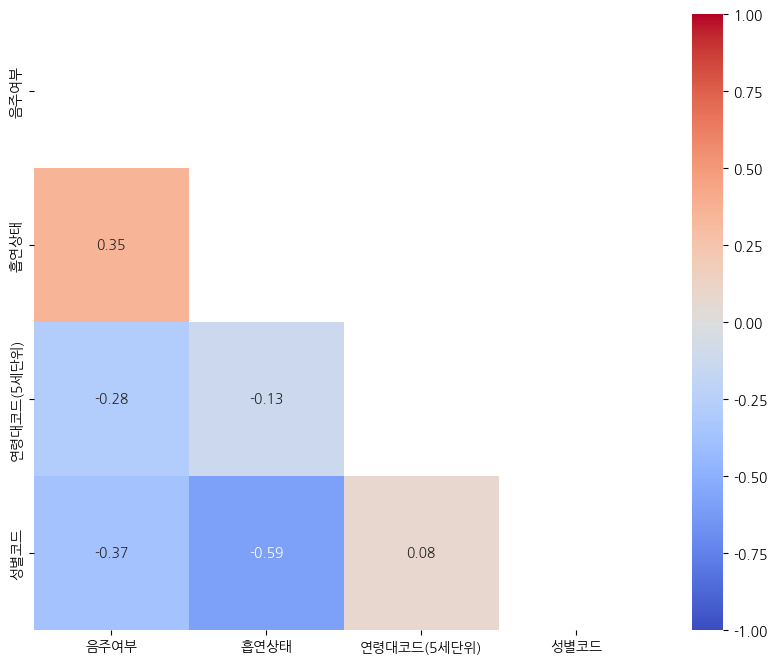

In [17]:
import matplotlib.pyplot as plt
sub_df = df[['음주여부','흡연상태','연령대코드(5세단위)','성별코드']]
correlation = sub_df.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, mask=mask)
plt.show()

## 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

In [18]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df["흡연"] = df['흡연상태'].map(smoke)
df["음주"] = df['음주여부'].map(drink)

<Axes: xlabel='흡연', ylabel='count'>

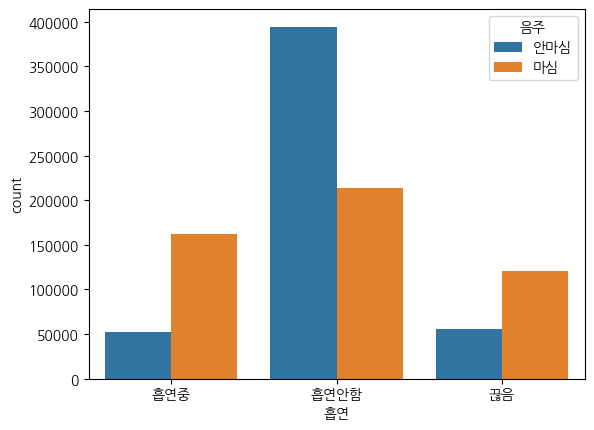

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="흡연", hue="음주")

## 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

In [20]:
over_weight=df[df['체중(5Kg 단위)']>120]

<Figure size 800x700 with 0 Axes>

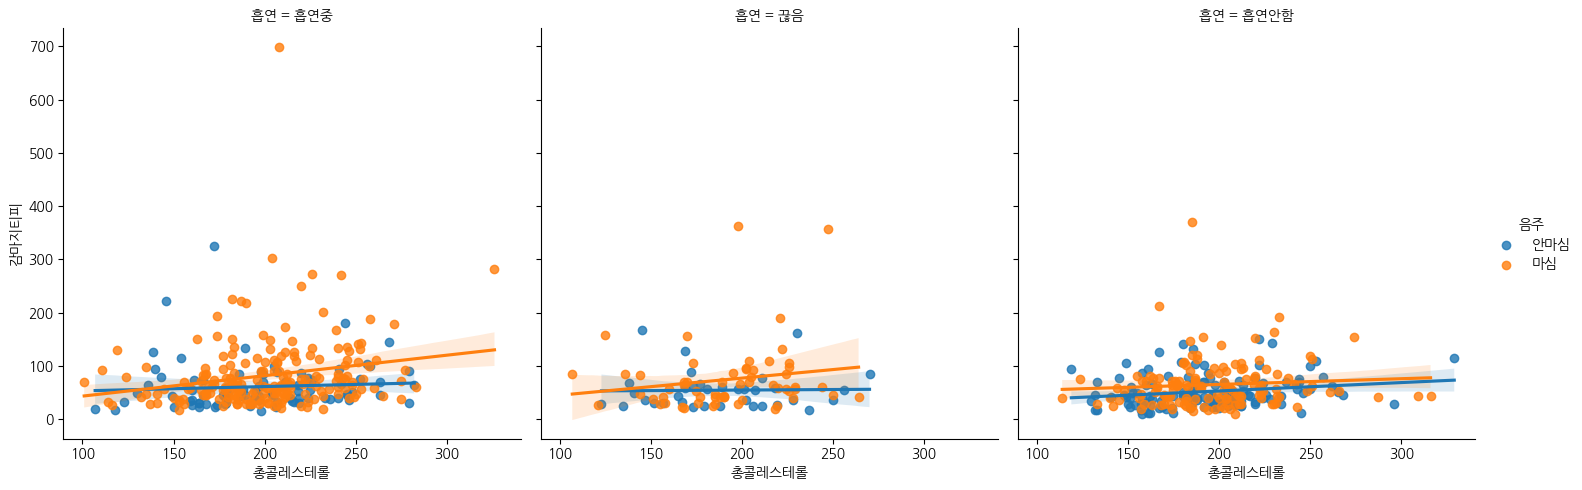

In [21]:
plt.figure(figsize=(8, 7))
sns.lmplot(data=over_weight, x="총콜레스테롤", y="감마지티피", hue="음주",col="흡연")

## 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

In [22]:
df = df[df['시력(좌)'] != 9.9]
df = df[df['시력(우)'] != 9.9]

In [23]:
average = df.groupby(['연령대', '성별코드'])[['시력(좌)', '시력(우)']].mean().reset_index()

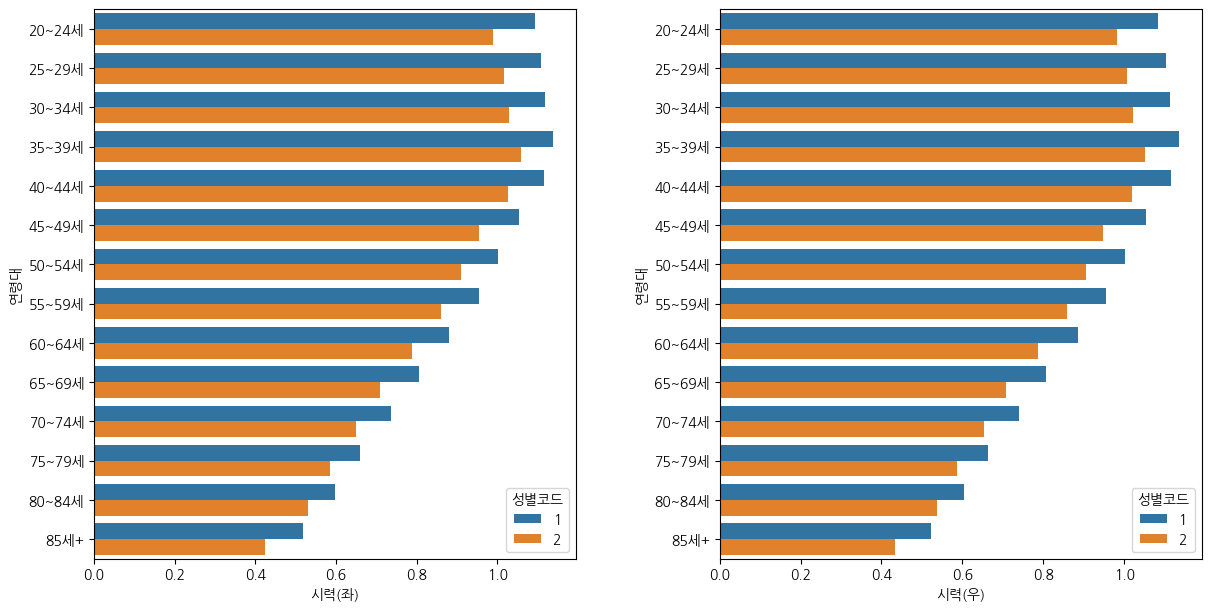

In [24]:
fig,ax=plt.subplots(ncols=2,figsize=(12,6),gridspec_kw={'wspace':0.1},constrained_layout=True)

b1=sns.barplot(data=average,x='시력(좌)',y='연령대',hue='성별코드',ax=ax[0])
b2=sns.barplot(data=average,x='시력(우)',y='연령대',hue='성별코드',ax=ax[1])